<a href="https://colab.research.google.com/github/YogithaMudoor/Taxi-Data-Analysis-FEB-2020-and-JUNE-2020-/blob/main/Taxi_Data_Analytics_Project_June_2020_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount the drive

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
trip_data = pd.read_csv('/content/taxi/yellow_taxi_data_2020-06_cleaned.csv')
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,140,68,Credit_card,15.5,4.00,0.0,23.30,18.583333,0,0,Monday,2020-06-01,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,79,226,Credit_card,19.5,2.00,0.0,25.30,21.716667,0,1,Monday,2020-06-01,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,238,116,Cash,10.0,0.00,0.0,11.30,9.300000,0,0,Monday,2020-06-01,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,141,116,Cash,17.5,0.00,0.0,21.30,15.416667,0,1,Monday,2020-06-01,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,186,75,Credit_card,14.5,3.65,0.0,21.95,12.816667,0,0,Monday,2020-06-01,3.8


Now this problem statement is very open ended as we are not given a clear idea exactly what kinds of analysis we should do.

We are just told about the data which we have to explore and analyse.

In such cases we could follow the below series of steps to standardise our exploration of the dataset.

- Start by writing the assumption and question that you want to solve (This is just a preliminary assumption and question writing and you need to be too much detailed here). The purpose of this is to identify the most important analysis that you should and not miss it out.
- Univariate analysis
    - Analyse each feature separately
    - Depending upon data type execute the analysis
     - numerical and visual
    - Data validation - check if the data is correct or not
    - You should try to identify trends and test your assumptions here 
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Bivariate analysis 
    - analyse combination of features (if possible analyse all combinations but definitely go for the feature combinations that makes most sense to analyse)
    - correlation and pair plotting
    - You should try to identify trends and test your assumptions here
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Custom Analysis - You would have some insights by this point of the analysis. Then you deep dive into these insights.
- Combine your results and present it

Except for custom analysis part we will be executing all the parts below.

## ASSUMPTIONS/ANALYSIS THAT MIGHT BE USEFUL FOR OUR COMPANY<br>

**IMPORTANT CHARACTERISTICS OF A TRIP**
* fare_amount, trip_distance, duration and passenger count distribution can tell us about the important characteristics about the trip.


**PRICING EXPLORATION**
* payment_type can tell us which kind of payment mode the customer usually favours.


* Another issue that taxi companies face is pricing the trip appropriately. So for exploring the pricing of trip, we can also look into the relationship between pricing related variables and hour/day of trip and pricing related variables and location.

**TIME/LOCATION EXPLORATION** 
* To maximize the earnings we should be focussing on trips which are on busy locations and busy times. 


**DURATION OF TRIP EXPLORATION**
* A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip. So, We should look into relationship between duration and location, duration and hour of trip.




## **Univariate Analysis**

The first step in doing any kind of EDA is identifying the distribution of important variables in EDA. This helps us in finding important insights about the data.<br>
We should look into the distribution of these specific columns:<br>
Price Based Columns
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* payment_type
* total_amount

Time Based Columns
* duration
* trip_pickup_hour
* trip_dropoff_hour
* trip_day

Distance/Location Based Columns
* trip_distance
* PULocationID
* DOLocationID

Other columns
* passenger_count

Before we explore the distribution of each column we must identify column category because distribution analysis depends upon variable category:<br>
* Continuous - column which are measurable and uncountable in nature - we use histograms and box plot
* Categorical - column which have categories as it data - we use bar charts

Following columns are continuous in nature:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount
* duration
* trip_distance
* tolls_amount

Following columns are categorical in nature:<br>
* payment_type
* trip_pickup_hour - it has 24 categories
* trip_dropoff_hour - it has 24 categories
* trip_day - it has 7 categories
* PULocationID
* DOLocationID
* Passenger_count

We will look into the distrbution of passenger_count at the last.

**CONTINUOUS VARIABLE DISTRIBUTION**

In [ ]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_taxes','total_amount','duration','trip_distance','tolls_amount']

In [ ]:
trip_data[continuous_columns].head()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
0,15.5,4.00,3.8,23.30,18.583333,3.6,0.0
1,19.5,2.00,3.8,25.30,21.716667,5.6,0.0
2,10.0,0.00,1.3,11.30,9.300000,2.3,0.0
3,17.5,0.00,3.8,21.30,15.416667,5.3,0.0
4,14.5,3.65,3.8,21.95,12.816667,4.4,0.0


In [ ]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,549797.000000,549797.000000,549797.000000,549797.000000,549797.000000,549797.000000,549797.000000
mean,13.606654,1.762841,1.812127,18.768776,13.432699,4.104234,0.367075
std,13.521156,2.631436,1.278758,15.178719,718.479954,336.012975,1.751976
min,-216.000000,-36.300000,-5.300000,-216.300000,-531231.233333,0.000000,-28.750000
25%,6.000000,0.000000,0.800000,10.700000,5.566667,1.010000,0.000000
50%,9.000000,1.500000,1.300000,14.160000,9.416667,1.860000,0.000000
75%,15.500000,2.750000,3.300000,20.800000,15.866667,3.660000,0.000000
max,941.500000,422.680000,88.360000,1141.100000,4497.566667,220386.230000,114.750000


Since we are trying to understand the distribution of continuous numerical variables, we will be using 
* histograms
* box plots

Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


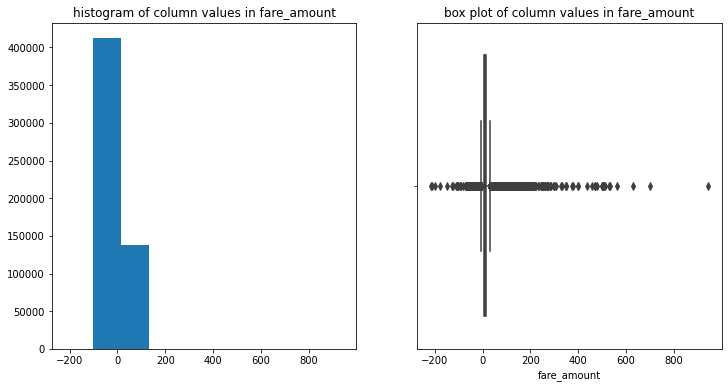

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


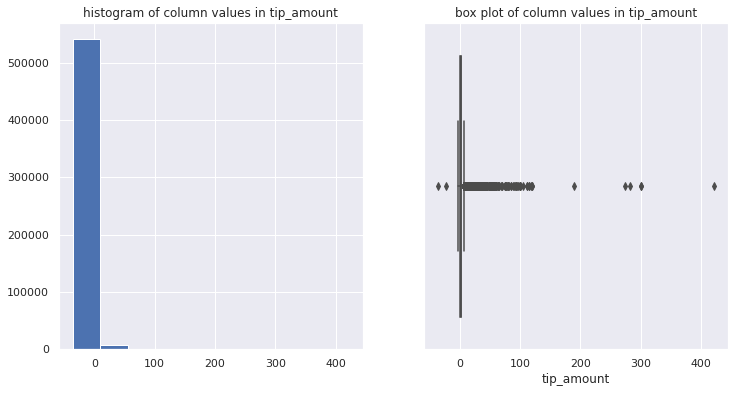

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


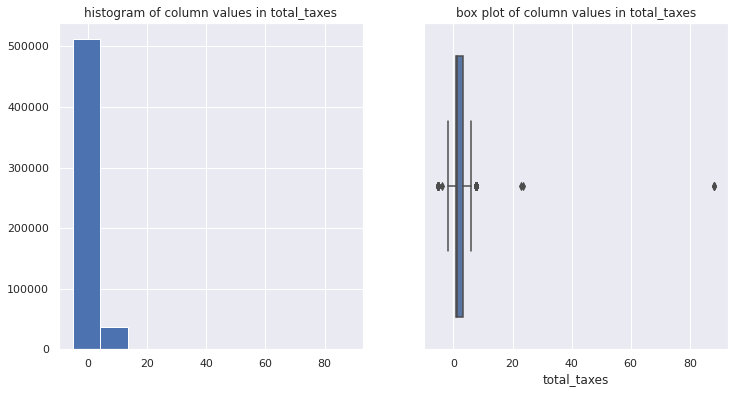

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


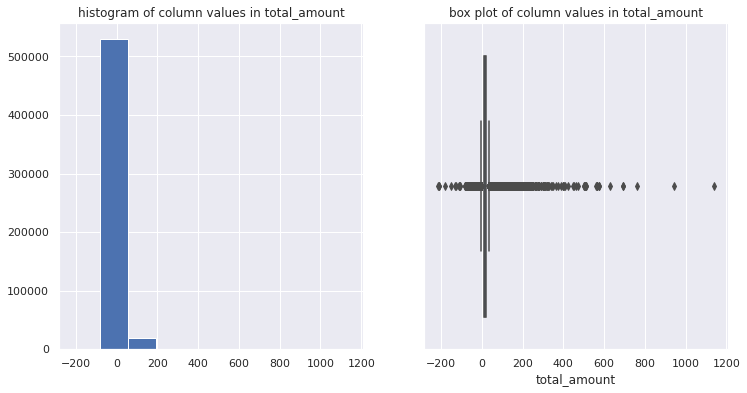

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


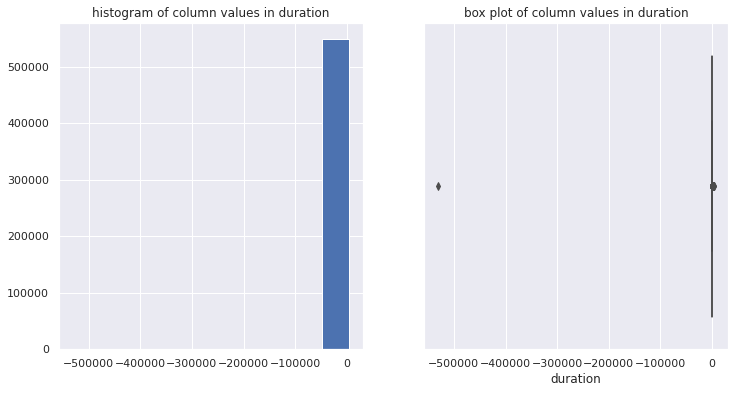

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


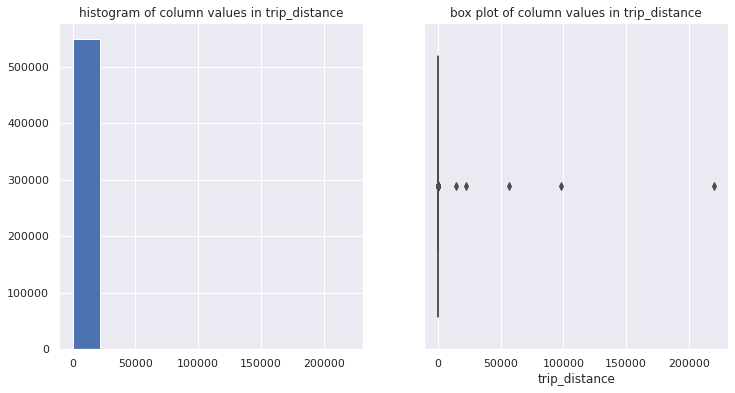

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


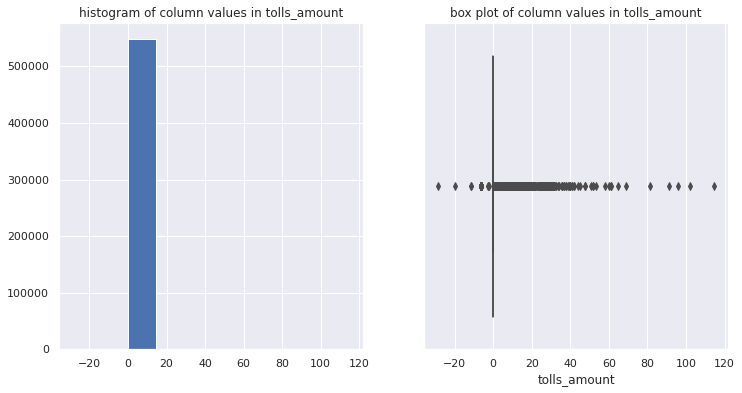

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense<br>
fare_amount<br>
tip_amount<br>
total_taxes<br>
tolls_amount<br>
total_amount<br>
duration<br>

Let's just observe how the negative values in each of these columns look like

In [ ]:
# using .loc to show negative values in fare_amount  # 8 mil rows
trip_data.loc[trip_data['fare_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1.0,1.11,100,249,Dispute,-5.50,0.00,0.00,-9.30,3.550000,0,0,Monday,2020-06-01,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1.0,0.00,186,186,No_charge,-2.00,0.00,0.00,-4.80,0.283333,0,0,Monday,2020-06-01,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1.0,1.61,260,7,Dispute,-12.50,0.00,0.00,-13.80,16.433333,1,2,Monday,2020-06-01,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1.0,2.62,95,160,Dispute,-13.50,0.00,0.00,-14.80,20.166667,1,2,Monday,2020-06-01,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1.0,0.04,246,246,No_charge,-2.50,0.00,0.00,-6.30,0.233333,1,1,Monday,2020-06-01,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537086,2020-06-23 15:25:00,2020-06-23 15:34:00,NaN,2.32,137,145,Voided_trip,-6.15,2.75,29.62,27.02,9.000000,15,15,Tuesday,2020-06-23,0.8
537094,2020-06-23 15:44:00,2020-06-23 15:45:00,NaN,0.09,137,137,Voided_trip,-14.33,0.00,0.00,-11.03,1.000000,15,15,Tuesday,2020-06-23,0.8
539544,2020-06-24 21:32:00,2020-06-24 21:33:00,NaN,0.23,74,75,Voided_trip,-16.44,3.53,0.00,-12.11,1.000000,21,21,Wednesday,2020-06-24,0.8
539568,2020-06-24 22:05:00,2020-06-24 22:51:00,NaN,25.30,55,42,Voided_trip,-104.92,2.75,17.87,-83.50,46.000000,22,22,Wednesday,2020-06-24,0.8


In [ ]:
# using .loc to show negative values in tip_amount
trip_data.loc[trip_data['tip_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
4969,2020-06-01 12:34:24,2020-06-01 12:34:46,1.0,0.00,193,193,Dispute,-2.50,-0.01,0.0,-3.31,0.366667,12,12,Monday,2020-06-01,-0.8
29627,2020-06-03 10:19:57,2020-06-03 10:20:14,1.0,0.00,193,193,No_charge,-2.50,-0.82,0.0,-4.12,0.283333,10,10,Wednesday,2020-06-03,-0.8
31382,2020-06-03 12:34:51,2020-06-03 12:35:16,1.0,0.00,193,193,Dispute,-2.50,-0.01,0.0,-3.31,0.416667,12,12,Wednesday,2020-06-03,-0.8
69396,2020-06-06 09:22:35,2020-06-06 09:22:41,1.0,0.00,193,193,No_charge,-2.50,-0.06,0.0,-3.36,0.100000,9,9,Saturday,2020-06-06,-0.8
250800,2020-06-18 12:49:41,2020-06-18 12:51:54,1.0,0.00,7,7,No_charge,-3.50,-1.08,0.0,-5.38,2.216667,12,12,Thursday,2020-06-18,-0.8
261586,2020-06-18 21:07:58,2020-06-18 21:28:00,1.0,4.07,239,137,Dispute,-17.00,-22.00,0.0,-42.80,20.033333,21,21,Thursday,2020-06-18,-1.3
266861,2020-06-19 10:02:36,2020-06-19 10:25:54,1.0,10.59,231,223,Credit_card,-31.00,-36.30,0.0,-70.60,23.300000,10,10,Friday,2020-06-19,-0.8
267171,2020-06-19 10:49:38,2020-06-19 10:49:45,2.0,0.00,193,264,No_charge,-2.50,-0.66,0.0,-3.96,0.116667,10,10,Friday,2020-06-19,-0.8
287651,2020-06-20 12:00:05,2020-06-20 12:00:17,1.0,0.00,193,193,No_charge,-2.50,-0.66,0.0,-3.96,0.200000,12,12,Saturday,2020-06-20,-0.8
289530,2020-06-20 14:55:08,2020-06-20 14:55:43,1.0,0.00,193,193,No_charge,-2.50,-0.01,0.0,-3.31,0.583333,14,14,Saturday,2020-06-20,-0.8


In [ ]:
# using .loc to show negative values in tolls_amount
trip_data.loc[trip_data['tolls_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
26633,2020-06-03 01:01:05,2020-06-03 01:21:12,1.0,9.78,170,197,Dispute,-28.5,0.00,-6.12,-38.42,20.116667,1,1,Wednesday,2020-06-03,-1.3
50519,2020-06-04 17:45:16,2020-06-04 17:57:23,1.0,3.02,170,112,Cash,-11.5,0.00,-6.12,-21.92,12.116667,17,17,Thursday,2020-06-04,-1.8
57050,2020-06-05 10:53:22,2020-06-05 11:18:36,1.0,11.55,230,121,Dispute,-35.0,0.00,-6.12,-44.42,25.233333,10,11,Friday,2020-06-05,-0.8
58141,2020-06-05 11:17:46,2020-06-05 11:46:03,1.0,19.58,48,1,Cash,-53.0,0.00,-28.75,-85.05,28.283333,11,11,Friday,2020-06-05,-0.8
61204,2020-06-05 14:34:36,2020-06-05 14:49:27,1.0,9.82,138,235,No_charge,-27.5,0.00,-6.12,-34.42,14.850000,14,14,Friday,2020-06-05,-0.8
67111,2020-06-05 20:12:07,2020-06-05 20:44:02,1.0,16.06,236,123,Dispute,-45.0,0.00,-6.12,-54.92,31.916667,20,20,Friday,2020-06-05,-1.3
76709,2020-06-06 19:34:15,2020-06-06 20:07:45,1.0,15.47,151,131,Dispute,-45.5,0.00,-6.12,-52.42,33.500000,19,20,Saturday,2020-06-06,-0.8
92473,2020-06-08 11:28:59,2020-06-08 11:57:17,1.0,12.87,138,32,Dispute,-37.0,0.00,-6.12,-43.92,28.300000,11,11,Monday,2020-06-08,-0.8
114260,2020-06-09 16:01:43,2020-06-09 16:33:58,1.0,5.68,152,193,No_charge,-25.5,0.00,-6.12,-33.42,32.250000,16,16,Tuesday,2020-06-09,-1.8
118430,2020-06-09 22:14:44,2020-06-09 22:51:44,4.0,16.51,24,10,Dispute,-48.0,0.00,-6.12,-55.42,37.000000,22,22,Tuesday,2020-06-09,-1.3


In [ ]:
# using .loc to show negative values in total_taxes
trip_data.loc[trip_data['total_taxes']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1.0,1.11,100,249,Dispute,-5.50,0.00,0.0,-9.30,3.550000,0,0,Monday,2020-06-01,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1.0,0.00,186,186,No_charge,-2.00,0.00,0.0,-4.80,0.283333,0,0,Monday,2020-06-01,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1.0,1.61,260,7,Dispute,-12.50,0.00,0.0,-13.80,16.433333,1,2,Monday,2020-06-01,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1.0,2.62,95,160,Dispute,-13.50,0.00,0.0,-14.80,20.166667,1,2,Monday,2020-06-01,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1.0,0.04,246,246,No_charge,-2.50,0.00,0.0,-6.30,0.233333,1,1,Monday,2020-06-01,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497574,2020-06-30 21:11:21,2020-06-30 21:12:12,1.0,0.03,41,41,Dispute,-2.50,0.00,0.0,-3.80,0.850000,21,21,Tuesday,2020-06-30,-1.3
498020,2020-06-30 21:56:04,2020-06-30 21:56:23,2.0,0.06,164,186,Dispute,-2.50,0.00,0.0,-6.30,0.316667,21,21,Tuesday,2020-06-30,-1.3
498165,2020-06-30 22:53:42,2020-06-30 23:14:21,1.0,5.18,186,41,Dispute,-18.50,0.00,0.0,-22.30,20.650000,22,23,Tuesday,2020-06-30,-1.3
500607,2020-06-02 00:51:10,2020-06-02 00:53:00,NaN,0.00,226,226,Voided_trip,-35.31,0.00,0.0,-37.76,1.833333,0,0,Tuesday,2020-06-02,-0.2


In [ ]:
# using .loc to show negative values in total_amount
trip_data.loc[trip_data['total_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1.0,1.11,100,249,Dispute,-5.50,0.00,0.00,-9.30,3.550000,0,0,Monday,2020-06-01,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1.0,0.00,186,186,No_charge,-2.00,0.00,0.00,-4.80,0.283333,0,0,Monday,2020-06-01,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1.0,1.61,260,7,Dispute,-12.50,0.00,0.00,-13.80,16.433333,1,2,Monday,2020-06-01,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1.0,2.62,95,160,Dispute,-13.50,0.00,0.00,-14.80,20.166667,1,2,Monday,2020-06-01,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1.0,0.04,246,246,No_charge,-2.50,0.00,0.00,-6.30,0.233333,1,1,Monday,2020-06-01,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534471,2020-06-22 05:43:00,2020-06-22 06:27:00,NaN,31.30,23,126,Voided_trip,-128.66,0.00,18.36,-109.50,44.000000,5,6,Monday,2020-06-22,0.8
535880,2020-06-23 02:01:17,2020-06-23 02:10:00,NaN,1.42,239,237,Voided_trip,-28.25,3.81,0.00,-21.14,8.716667,2,2,Tuesday,2020-06-23,0.8
537094,2020-06-23 15:44:00,2020-06-23 15:45:00,NaN,0.09,137,137,Voided_trip,-14.33,0.00,0.00,-11.03,1.000000,15,15,Tuesday,2020-06-23,0.8
539544,2020-06-24 21:32:00,2020-06-24 21:33:00,NaN,0.23,74,75,Voided_trip,-16.44,3.53,0.00,-12.11,1.000000,21,21,Wednesday,2020-06-24,0.8


Can i replace negative values of fare_amount with 0?

Ans. Not here. Because it will not give us a good measure of averages or other statistical measures. 

From the above table displays it is clear whenever fare_amount is negative, we have negative values in 'tip_amount','total_taxes' and 'total_amount'. You can check this by looking at the indexes of few of the rows.


Negative values for these cases does not make sense for doing our analysis. The reason for these negative values can be explored later on if we want to understand the data more better. For now we will remove these rows. 

Also, number of negative rows are 2544  which is 0.004% of total 549797 observations. So even if we remove them it does not hamper the quantity of data that we have.

In [ ]:
# data shape before filtering negative fare_amount rows
print(trip_data.shape)
# using .loc to filter only those rows where fare_amount is positive 
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
# print data shape
print(trip_data.shape)
# print data.head()
trip_data.head()

(549797, 17)
(547253, 17)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,140,68,Credit_card,15.5,4.00,0.0,23.30,18.583333,0,0,Monday,2020-06-01,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,79,226,Credit_card,19.5,2.00,0.0,25.30,21.716667,0,1,Monday,2020-06-01,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,238,116,Cash,10.0,0.00,0.0,11.30,9.300000,0,0,Monday,2020-06-01,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,141,116,Cash,17.5,0.00,0.0,21.30,15.416667,0,1,Monday,2020-06-01,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,186,75,Credit_card,14.5,3.65,0.0,21.95,12.816667,0,0,Monday,2020-06-01,3.8


Let's check if removing rows with negative fare amount has also removed rows with negative tip_amount, total_taxes etc.

In [ ]:
print(trip_data.loc[trip_data['tip_amount']<0].shape)
print(trip_data.loc[trip_data['total_taxes']<0].shape)
print(trip_data.loc[trip_data['tolls_amount']<0].shape)

(0, 17)
(0, 17)
(0, 17)


We will look into the negative values for duration

In [ ]:
# using .loc to show negative values in duration
trip_data.loc[trip_data['duration']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,trip_date,total_taxes
182436,2020-06-14 04:09:09,2019-06-11 06:17:55,1.0,8.10,262,138,Credit_card,26.00,7.18,6.12,43.10,-531231.233333,4,6,Sunday,2020-06-14,3.80
547518,2020-06-29 17:06:08,2020-06-29 17:06:04,NaN,6.62,265,22,Voided_trip,23.35,0.00,0.00,26.19,-0.066667,17,17,Monday,2020-06-29,2.84


Since there are only two rows with negative duration, we will remove them so as to do our analysis in a better way

In [ ]:
# using .loc to filter only those rows where duration is positive 
trip_data = trip_data.loc[trip_data['duration']>=0]
print(trip_data.shape)

(547251, 17)


Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


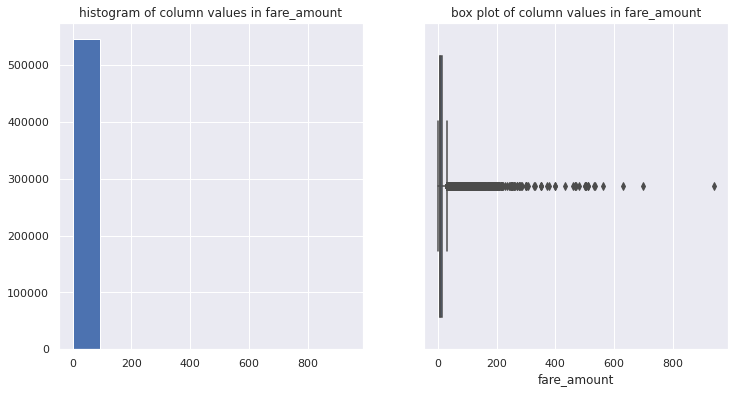

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


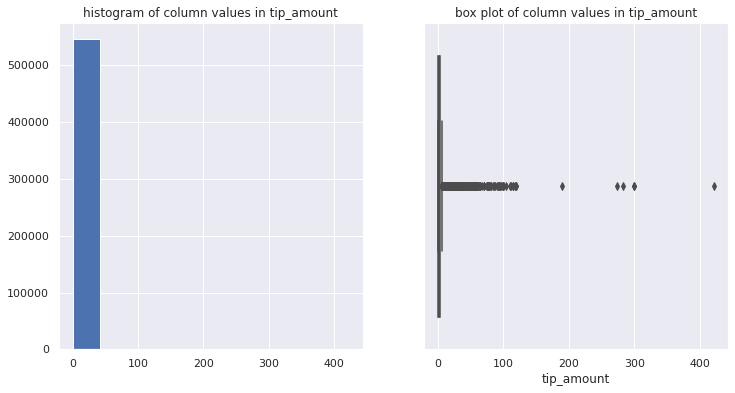

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


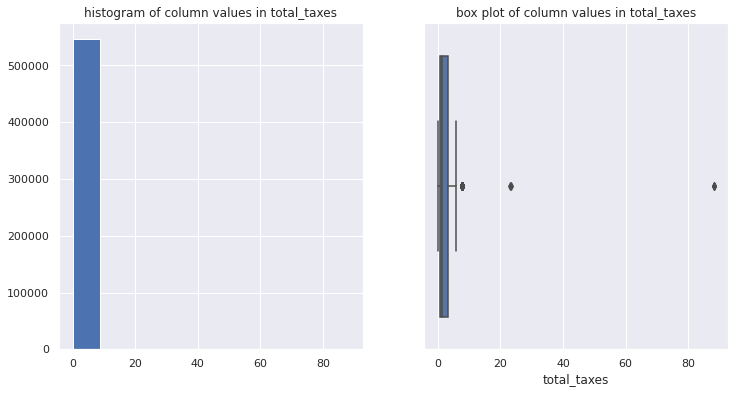

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


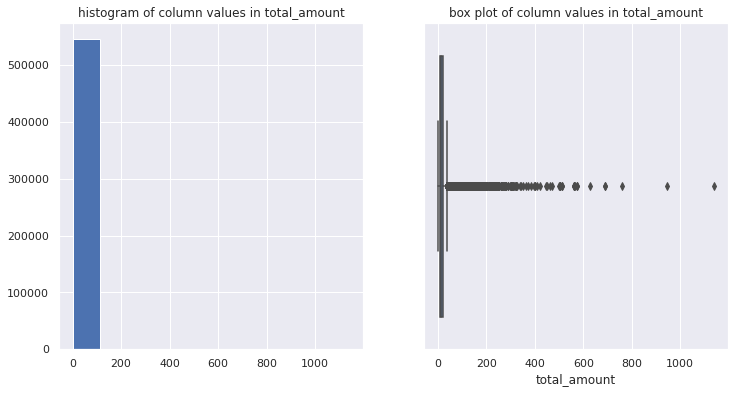

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


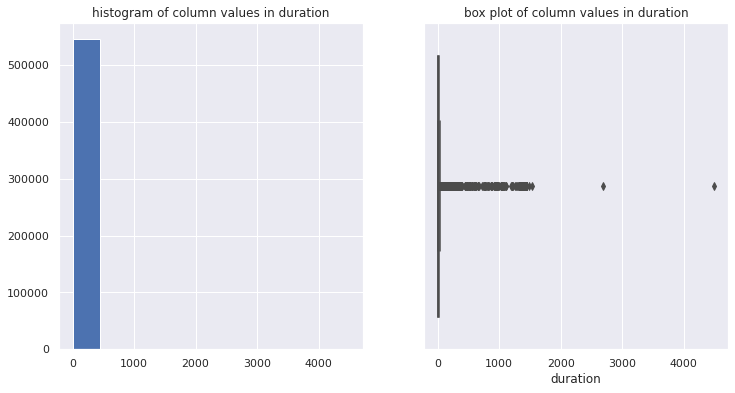

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


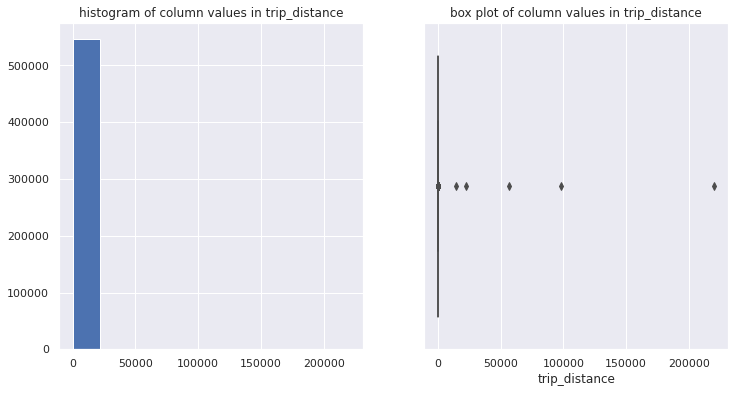

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


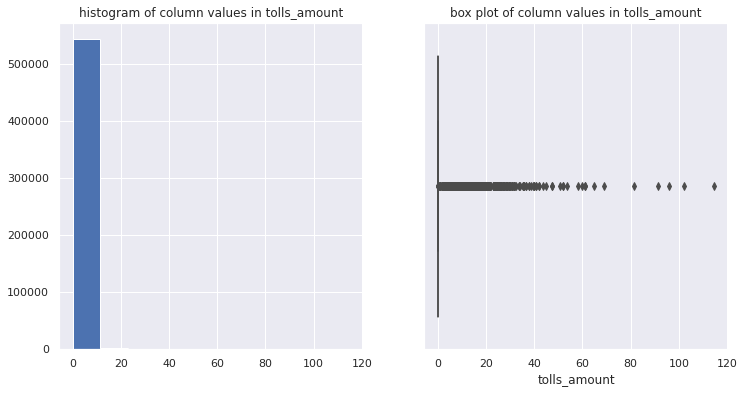

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [ ]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,547251.000000,547251.000000,547251.000000,547251.000000,547251.000000,547251.000000,547251.000000
mean,13.724144,1.770757,1.825650,18.924177,14.428544,4.113989,0.369018
std,13.396923,2.633436,1.265581,15.000023,53.899665,336.793583,1.752288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.800000,10.790000,5.583333,1.020000,0.000000
50%,9.000000,1.500000,1.300000,14.160000,9.433333,1.870000,0.000000
75%,15.500000,2.750000,3.300000,21.000000,15.883333,3.670000,0.000000
max,941.500000,422.680000,88.360000,1141.100000,4497.566667,220386.230000,114.750000


we need to improve the look of histograms and box plots further as we are not able to clearly observe the distribution.

We will filter all the data for each feature with values less than 90% ile. Then plot that data as shown below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


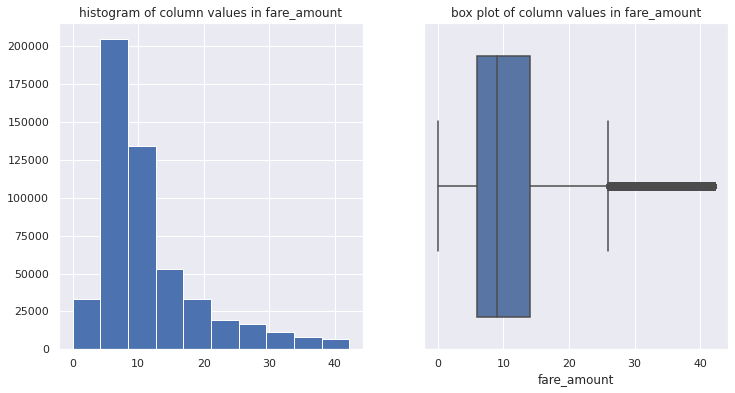

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


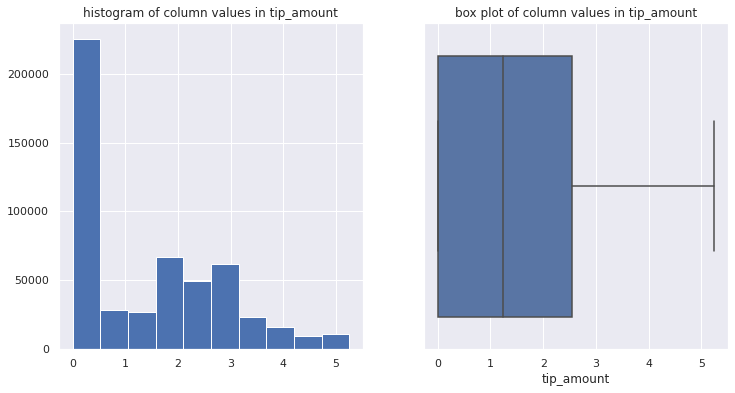

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


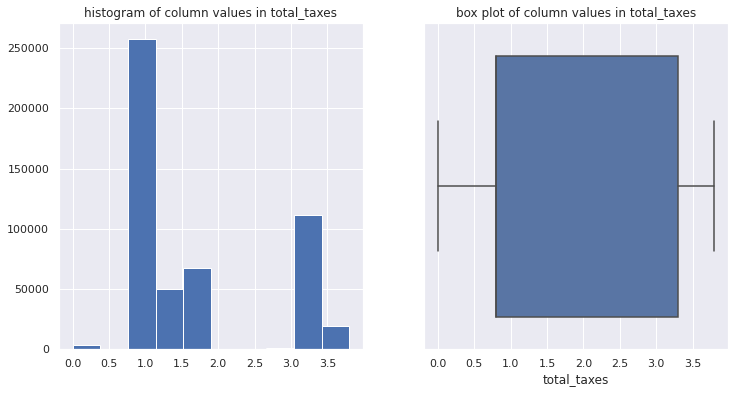

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


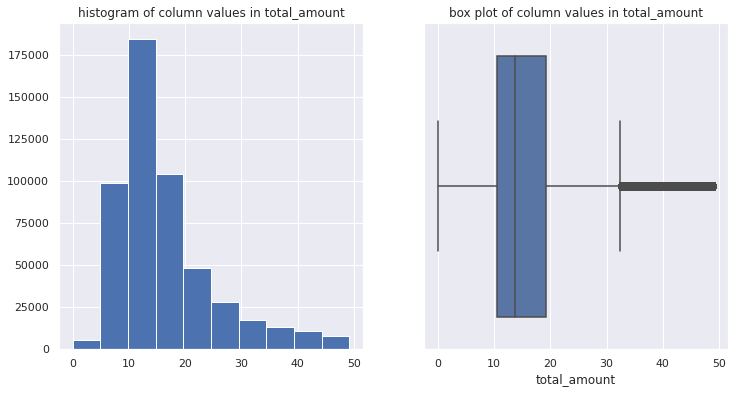

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


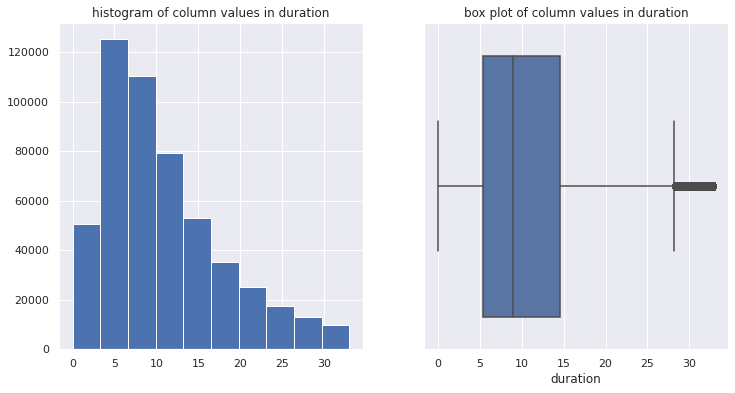

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


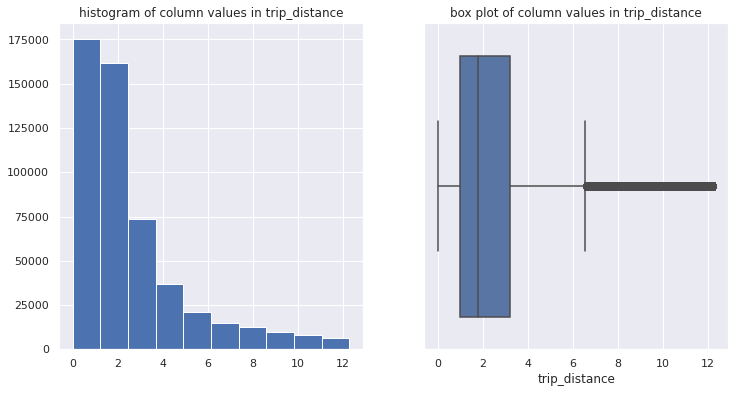

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


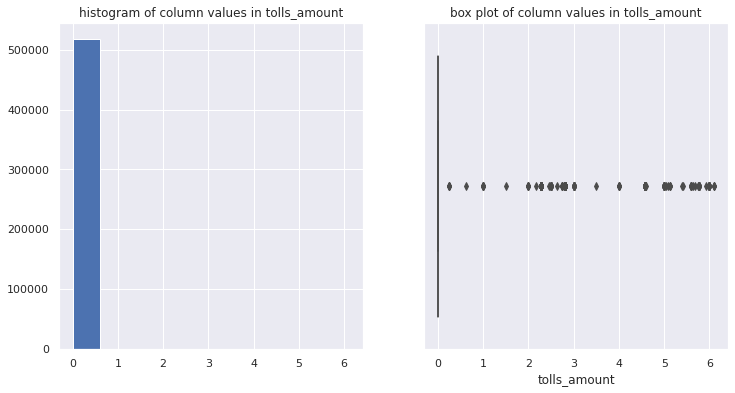

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column <br>
* fare_amount  - most of the fare amount is within 10 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 941 dollars.


* tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. 


* total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 10 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 1000 minutes.


* trip_distance - most of the trip_distance is within 1.87 miles value as is shown by the median. The outlier in this case is quite less.

**CATEGORICAL VARIABLE DISTRIBUTION**<br>
Let's move on to analyse the distribution of categorical variables

for analysing distribution of categorical variables we use bar plots showing the count% of each category.

In [ ]:
# list of categorical_variables
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [ ]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    322579
Cash           168391
Voided_trip     50680
No_charge        4476
Dispute          1113
Unknown            12
Name: payment_type, dtype: int64

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

,index,payment_type
0,Credit_card,322579
1,Cash,168391
2,Voided_trip,50680
3,No_charge,4476
4,Dispute,1113
5,Unknown,12


In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

,index,payment_type,count_percent
0,Credit_card,322579,58.945347
1,Cash,168391,30.770341
2,Voided_trip,50680,9.260833
3,No_charge,4476,0.817906
4,Dispute,1113,0.203380
5,Unknown,12,0.002193


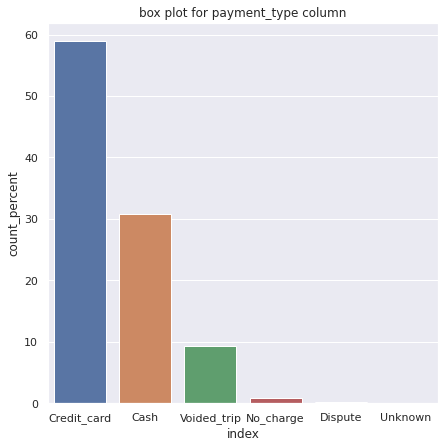

In [ ]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through credit card and cash. The proportion of credit card payments is around 60%.

Now we look into time based categorical variables.<br>
* 'trip_pickup_hour'
* 'trip_dropoff_hour'
* 'trip_day'


Number of categories in feature trip_pickup_hour is 24


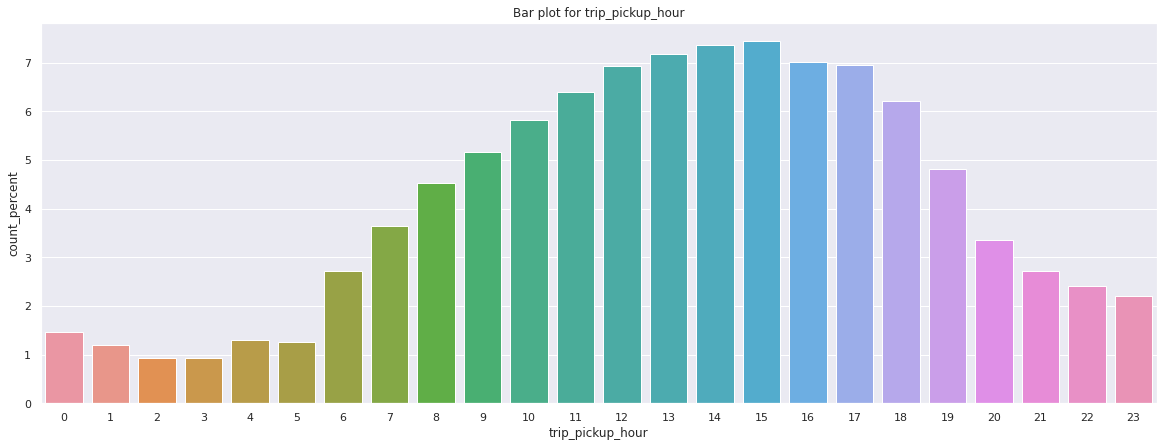

Number of categories in feature trip_dropoff_hour is 24


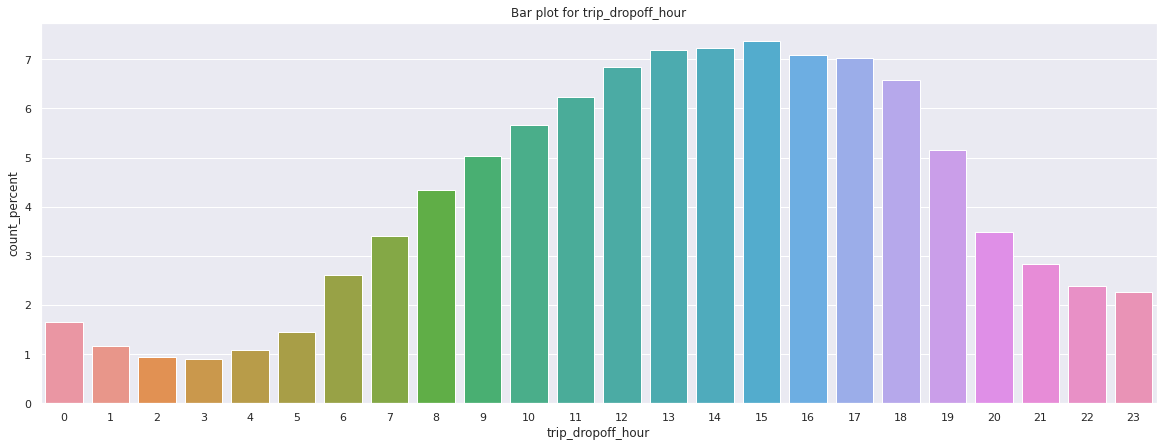

Number of categories in feature trip_day is 7


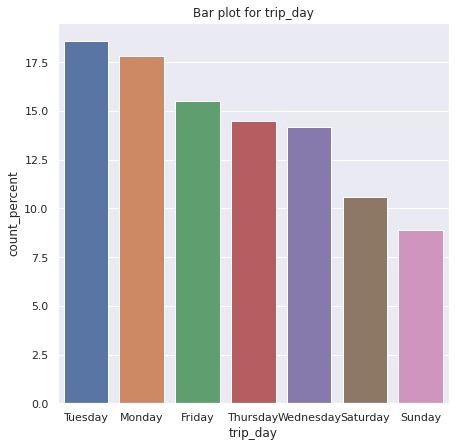

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things
* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is afternoon 12pm to 5PM. The busiest time is 3PM.
    * there is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Weekdays except wednesday have heavy taxi uses.
    * Among weekends Staturday also lowest taxi uses.


Moving on we will explore the distribution of location based features:<br>
* 'PULocationID'
* 'DOLocationID'

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(257,)
(260,)


So we have around 260 categories for location. To plot it on bar plots we need to increase the figure size.


Number of categories in feature PULocationID is 257


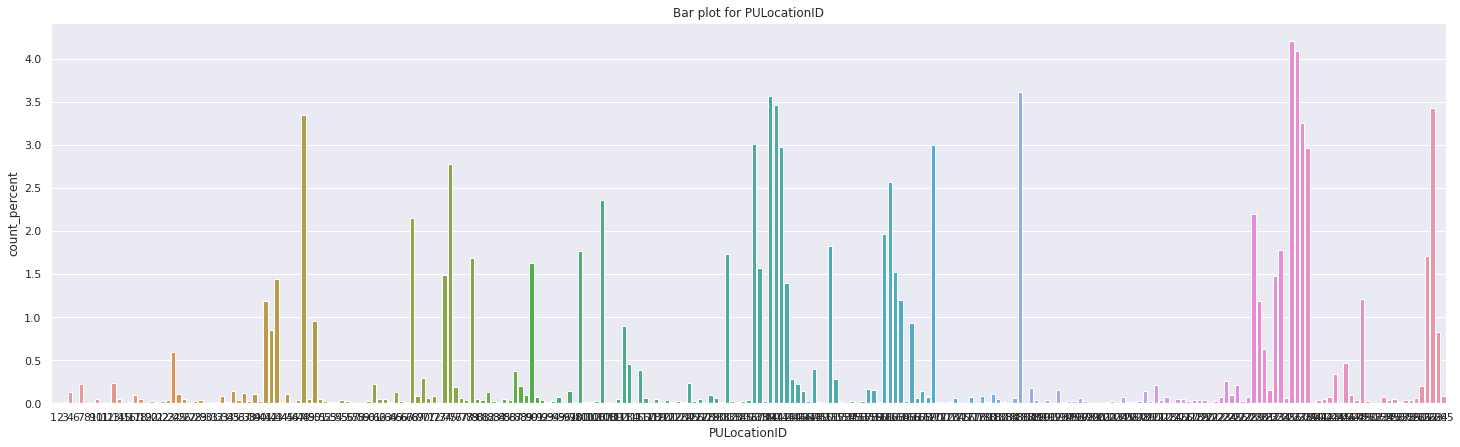

Number of categories in feature DOLocationID is 260


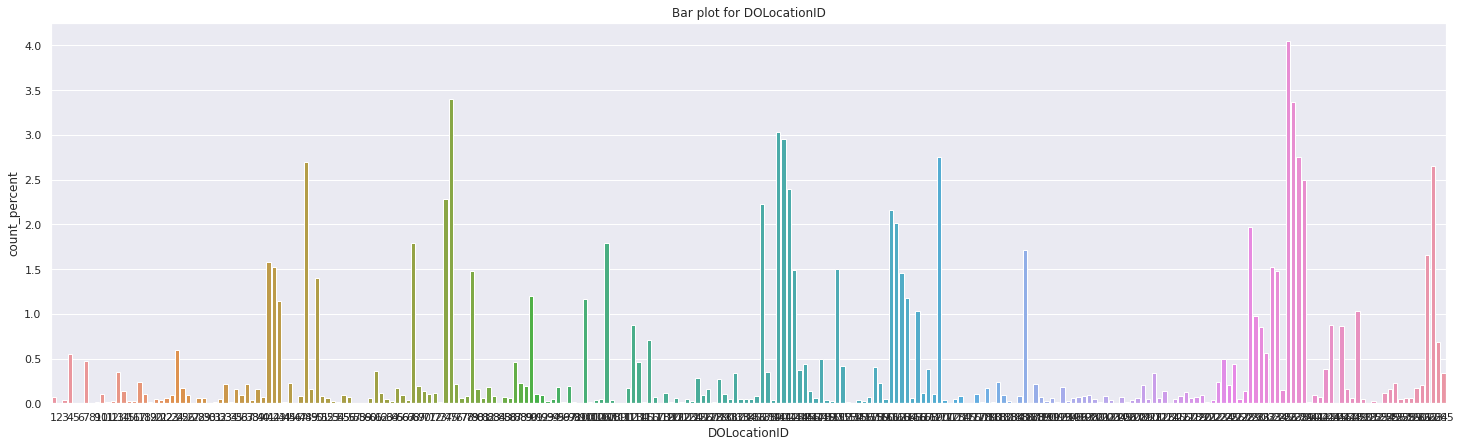

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 547251 total trips is 2736).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 42


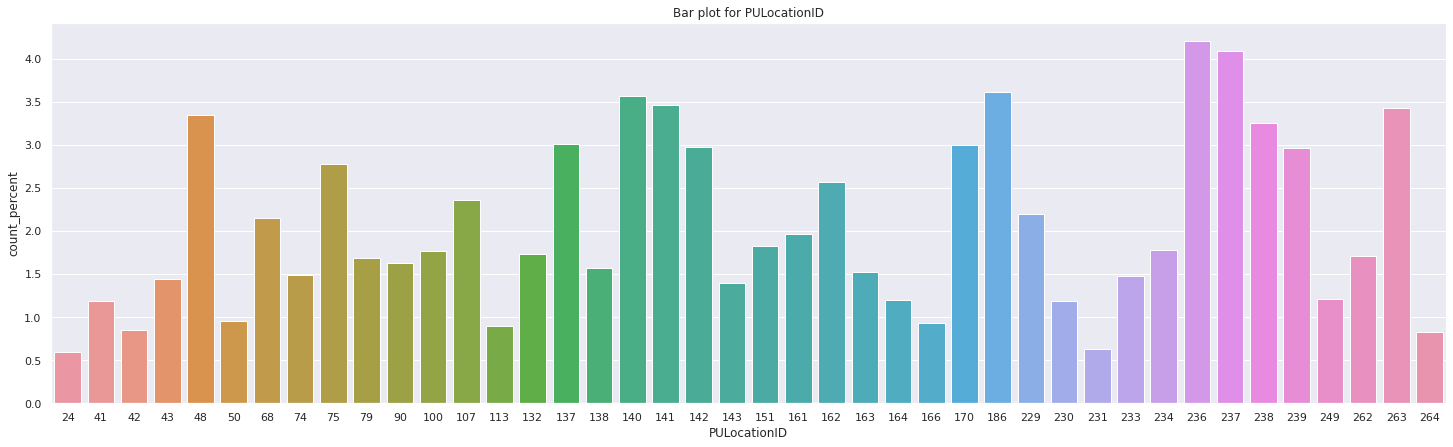

Number of categories in feature DOLocationID above 0.5 % count is 45


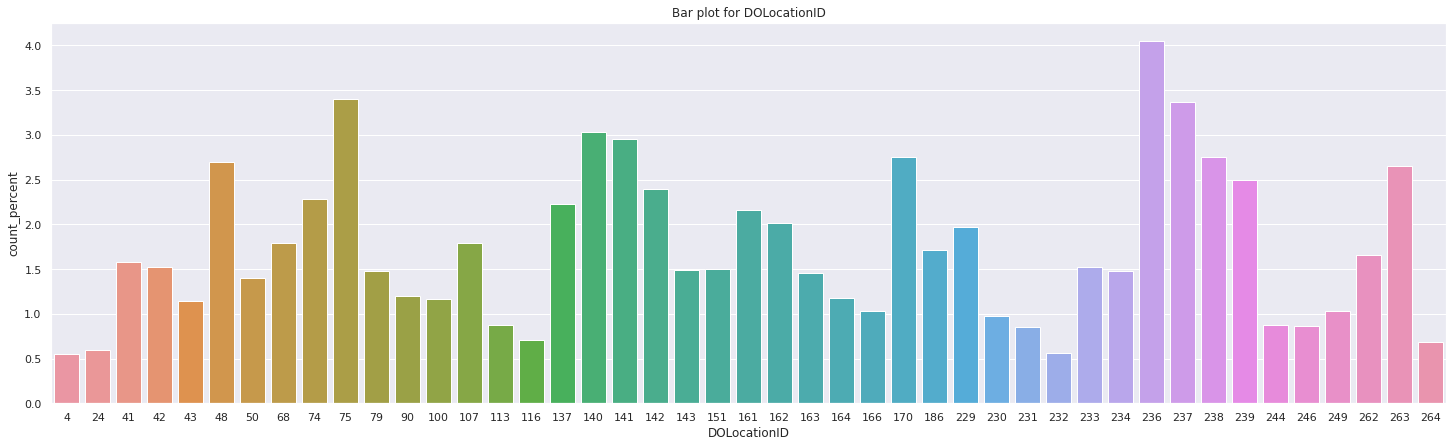

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights<br>
* The busiest location in terms of pickup are 186, 236 and 237
* The busiest location for dropoff too are 75, 236 and 237.

We can also look for routes which are busiest. 

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [ ]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
# print the first five rows of routes data
trip_data['routes'].head()

0     140-68
1     79-226
2    238-116
3    141-116
4     186-75
Name: routes, dtype: object

Since the above code takes a lot of time to execute we will import already created routes data based on the above code and then merge it with the trip_data dataframe.

In [ ]:
# save routes data to csv to load it later for analysis
trip_data['routes'].to_csv('/content/taxi/routes_yellow_tripdata_2020-06.csv',index=False)

In [ ]:
# loading routes_data
file_loc_routes_data = '/content/taxi/routes_yellow_tripdata_2020-06.csv'
routes_data = pd.read_csv(file_loc_routes_data)
# assigning new column 'routes' in trip_data to routes_data
trip_data['routes'] = routes_data

In [ ]:
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes,routes
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,41,24,Cash,4.5,0.00,0.0,5.80,3.300000,0,0,Monday,1.3,41-24
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,239,140,Cash,14.0,0.00,0.0,15.30,18.166667,0,1,Monday,1.3,239-140
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,262,141,Credit_card,6.0,1.00,0.0,8.30,5.916667,0,0,Monday,1.3,262-141
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,140,257,Cash,33.5,0.00,0.0,34.80,32.483333,0,0,Monday,1.3,140-257
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,246,239,Credit_card,12.5,2.75,0.0,16.55,17.800000,0,0,Monday,1.3,246-239


Now let's explore routes through the same bar plot code that we used for Location ID's. But in this case we will only look for routes with more than 0.25% counts (1368 trips).

Number of categories in feature routes above 0.25 % count is 15


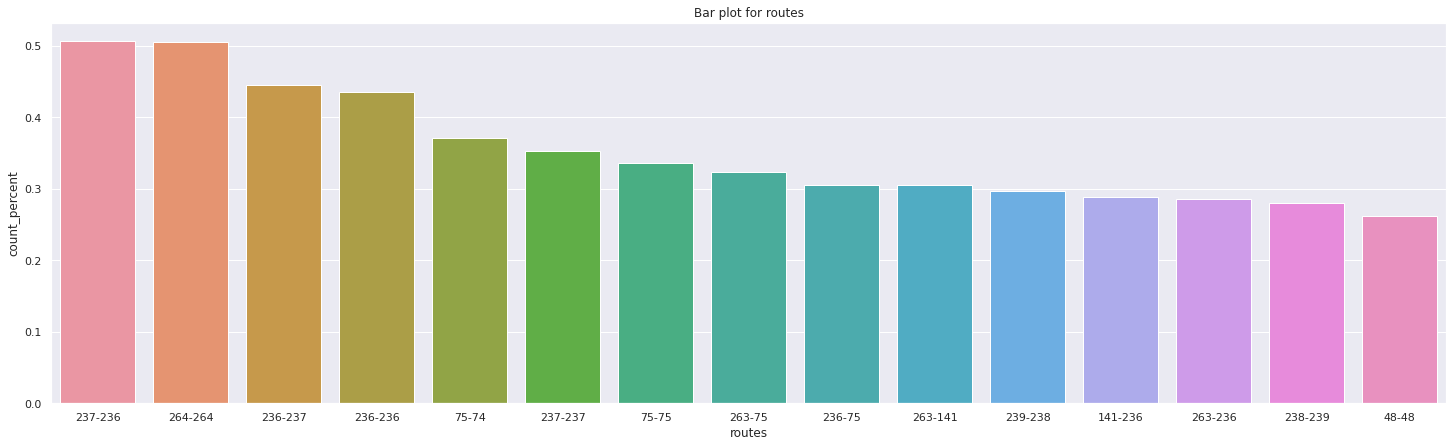

In [ ]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:<br>
237-236<br>
264-264<br>
236-237<br>
236-236<br>
75-74<br>



Finally we will look into the distribution of passenger_count

In [ ]:
# look into value_counts of 'passenger_count'
trip_data['passenger_count'].value_counts()

1.0    386903
2.0     56951
3.0     14257
0.0     13303
5.0     11187
6.0      9045
4.0      4922
9.0         2
8.0         1
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

This is the result of some of the most important insights after doing univariate analysis:<br>
* fare_amount  - most of the fare amount is within 10 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 941 dollars.


* tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. 


* total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 10 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 1000 minutes.


* trip_distance - most of the trip_distance is within 1.87 miles value as is shown by the median. The outlier in this case is quite less.
* Peak hour for the pick up and drop off is afternoon 12pm to 5PM. The busiest time is 3PM.

*   Sunday has the lowest taxi uses.
Weekdays except wednesday have heavy taxi uses.
Among weekends Staturday also lowest taxi uses.
 

* 5 busiest route are following:
237-236
264-264
236-237
236-236
75-74
* Credit card is the most preferred mode of payment followed by cash.

* The busiest location in terms of pickup and dropoff are 186,75, 236 and 237 
* Mostly 1 or 2 passenger avail the cab. Group rides are less common.

## **Bivariate Analysis**

Remember that we made some analysis points regarding exploration of duration and pricing:<br>

For pricing we will be exploring it's relationship with:<br>
* hour/day of trip 
* pickup location of trip

For duration we will be exploring it's relationship with:<br>
* hour of day 
* pickup location of trip


**PRICING EXPLORATION**

We have following variables in the dataset that is associated with pricing:<br>
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* total_amount

In our anlaysis for now we will be focussing on:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount

we are leaving tolls_amount for now from our analysis as it contributes very little to the total_amount value because it's median value was 0 i.e. most of the trips are not paying tolls_amount.


*** PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP ***<br>
All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

Let's do a box plot of fair_amount with hour/day of trip to see how the fare changes for different hours of the day and for different days of the week

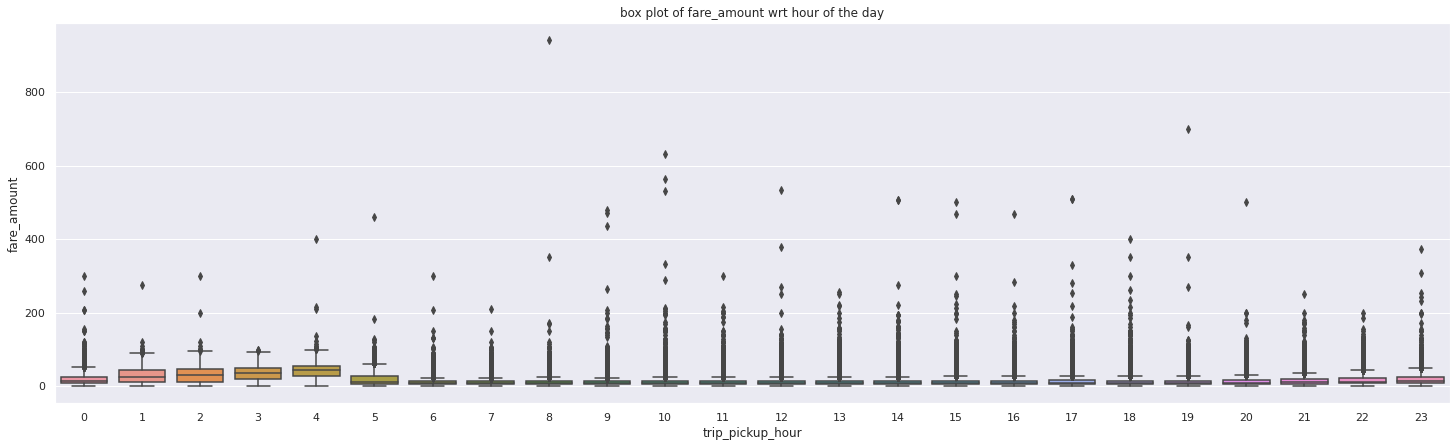

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

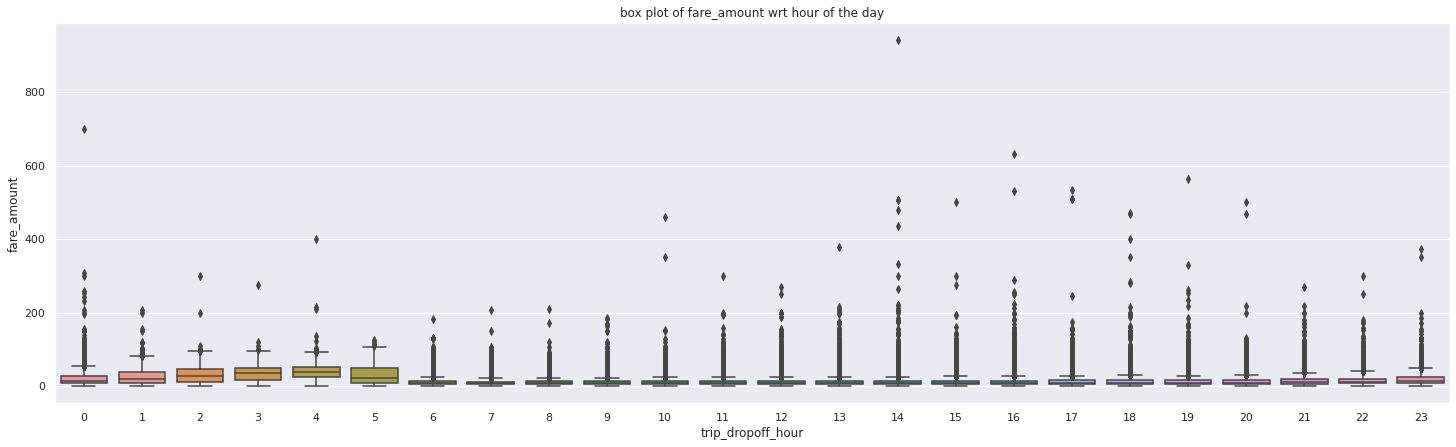

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare happens during 8AM and 19 that is 7PM based on pickup time.

Based on dropoff time, we have heavy outliers in the morning as well as evening.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars. 

In [ ]:
#trip_data = trip_data.loc[trip_data['fare']]

In [ ]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(529085, 18)

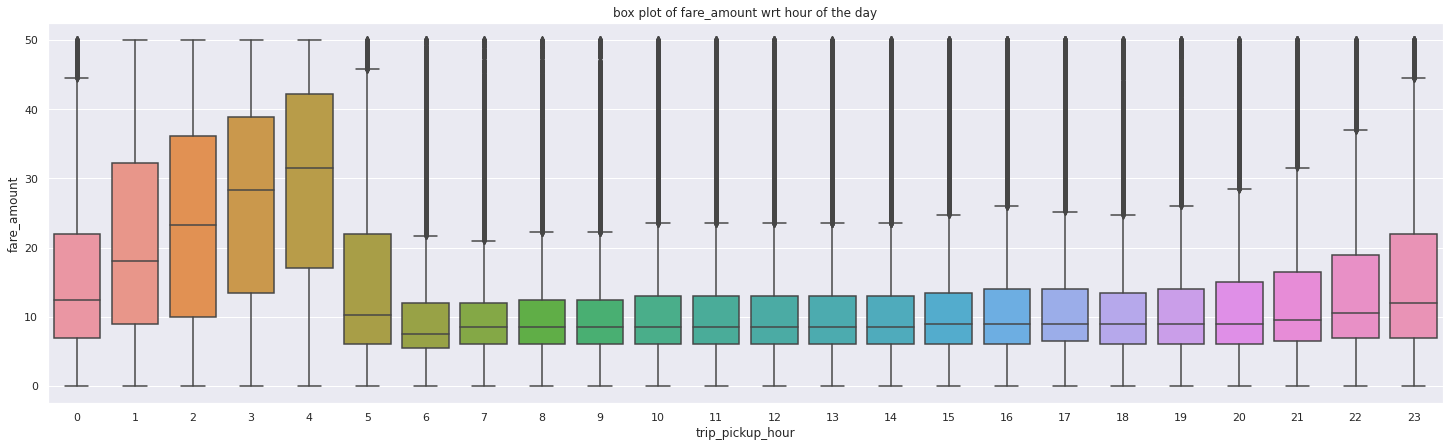

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

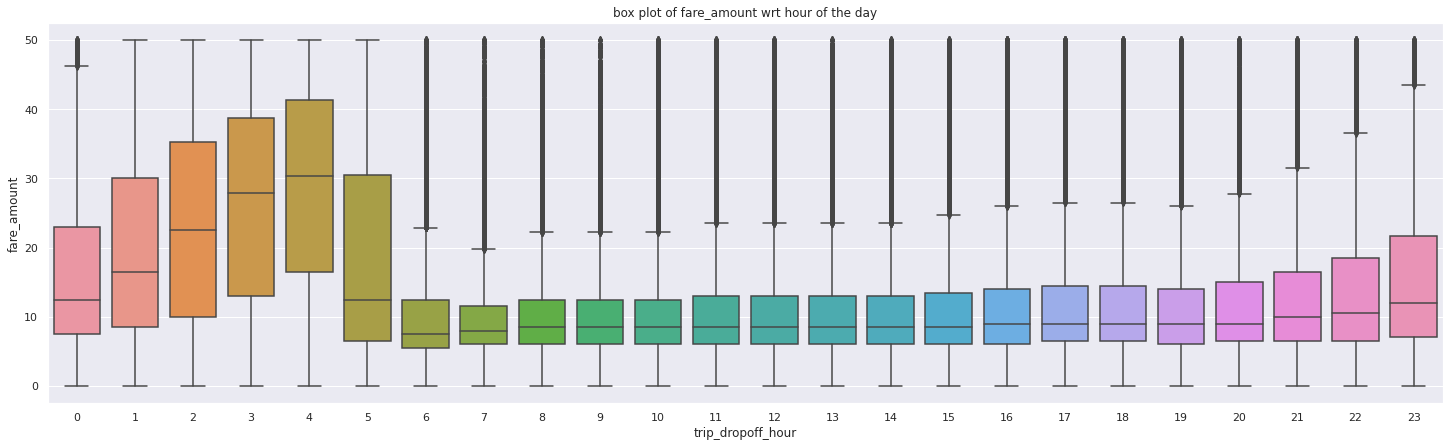

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can see from the plots that trip pickup and dropoff hours, median value is high during day time and median value is low during day time .

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

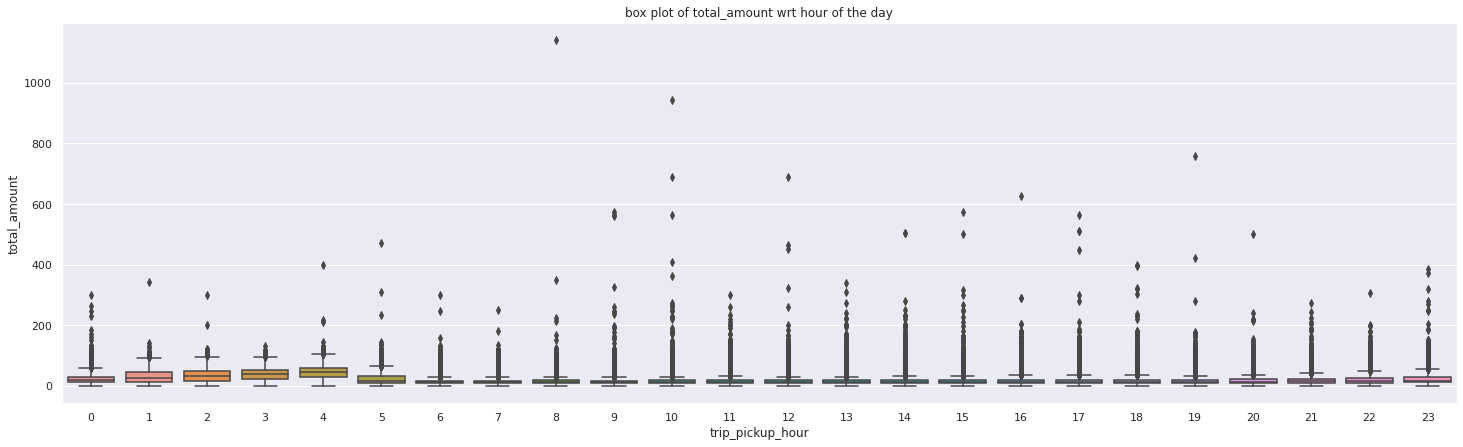

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

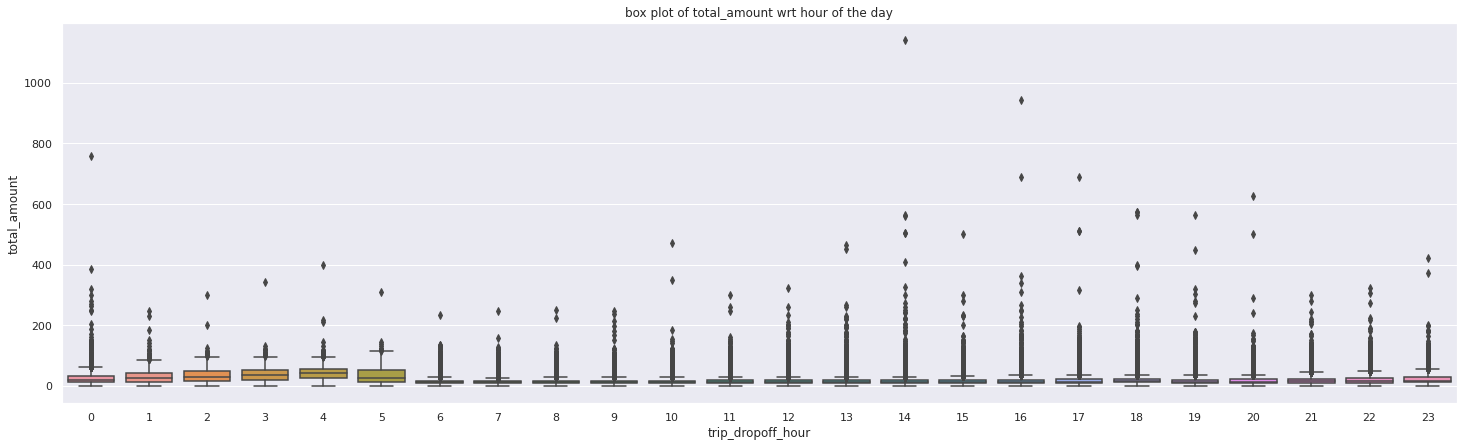

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again here since we are plotting full range of total_amount our graph is able to show heavy outliers prominently but not the distribution of general cases.

So we will again build a dataframe for total_amount with restricted values less than 50 dollars

In [ ]:
# restricted_total_amount_data for filtering total_amount data to less than 50 dollars
restricted_total_amount_data = trip_data.loc[trip_data['total_amount']<=50]
restricted_total_amount_data.shape

(521514, 18)

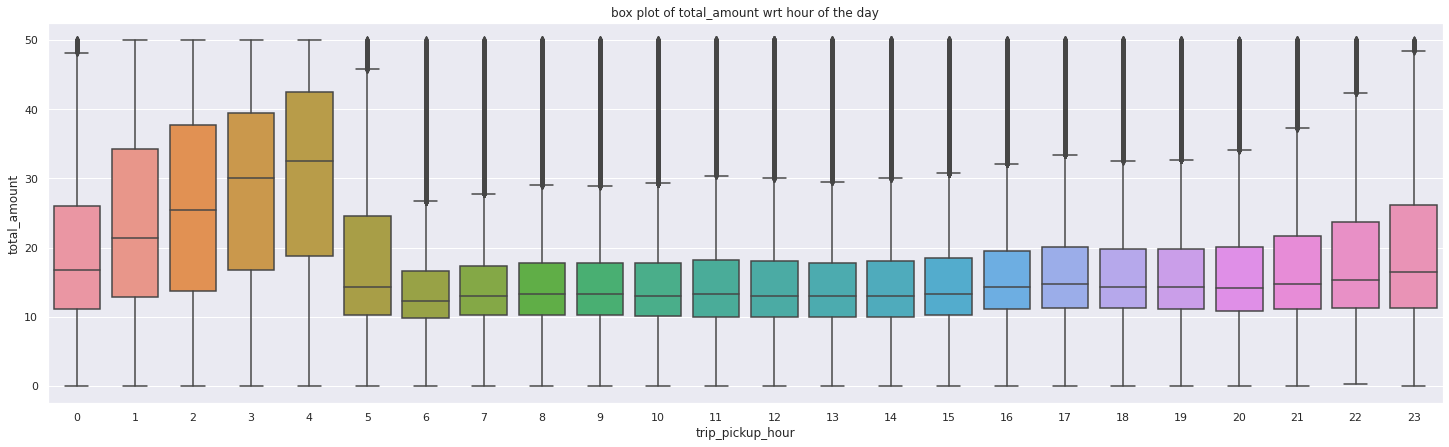

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

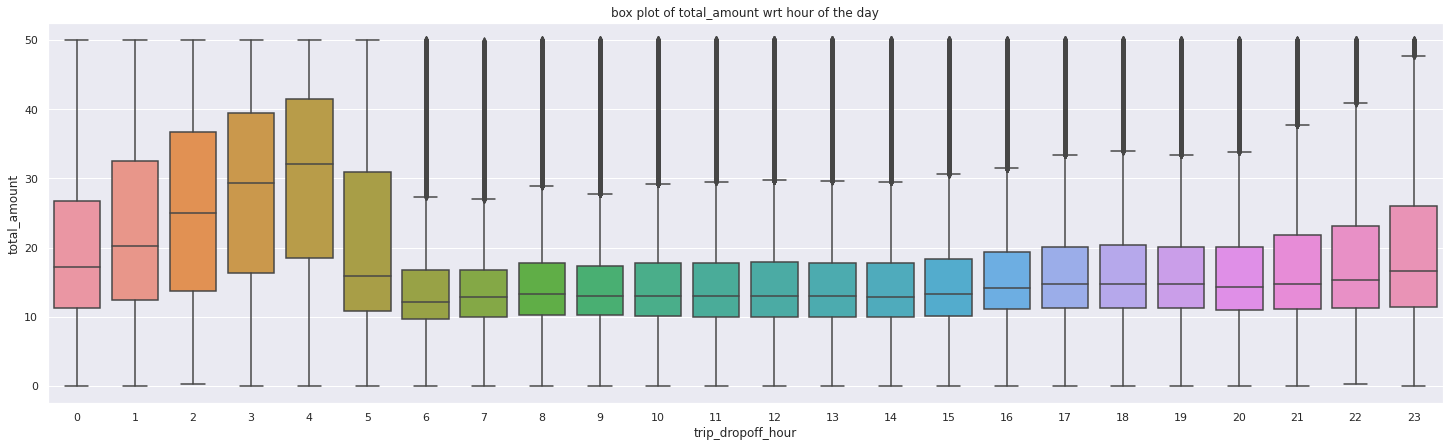

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again we can see the median value changes from day time to night time.

We will explore tip_amount and total_taxes now. But for exploring them we will retrict the values for these variables to below 10 dollars because the median value for tip_amount was around 1.5 dollars while for total_taxes was around 1.3 dollars so if to see the general distribution clearly we are restricting it to a range of around 5 times the median value.

In [ ]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_taxes']<10]

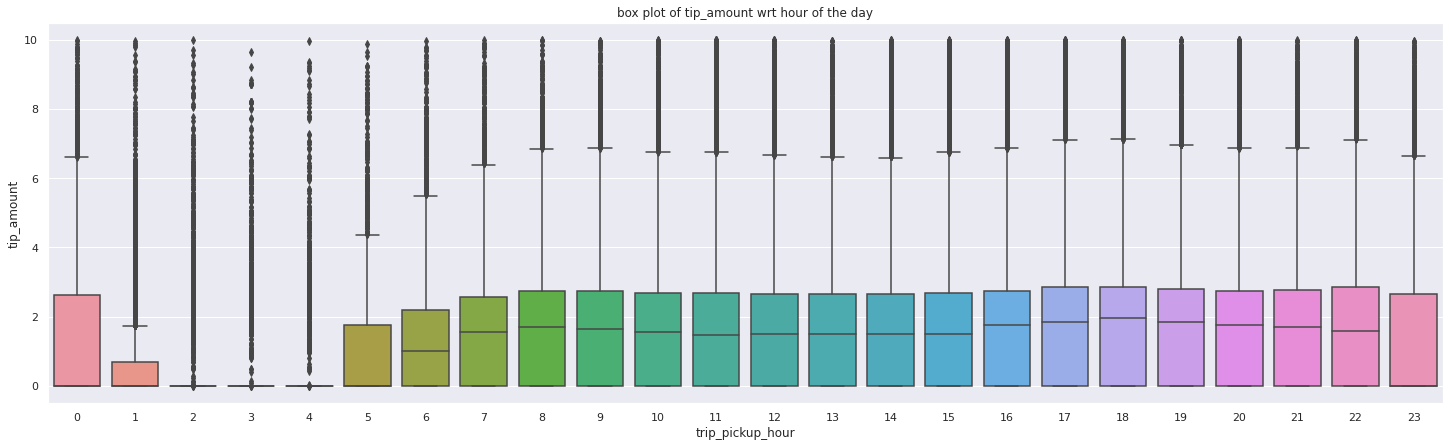

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

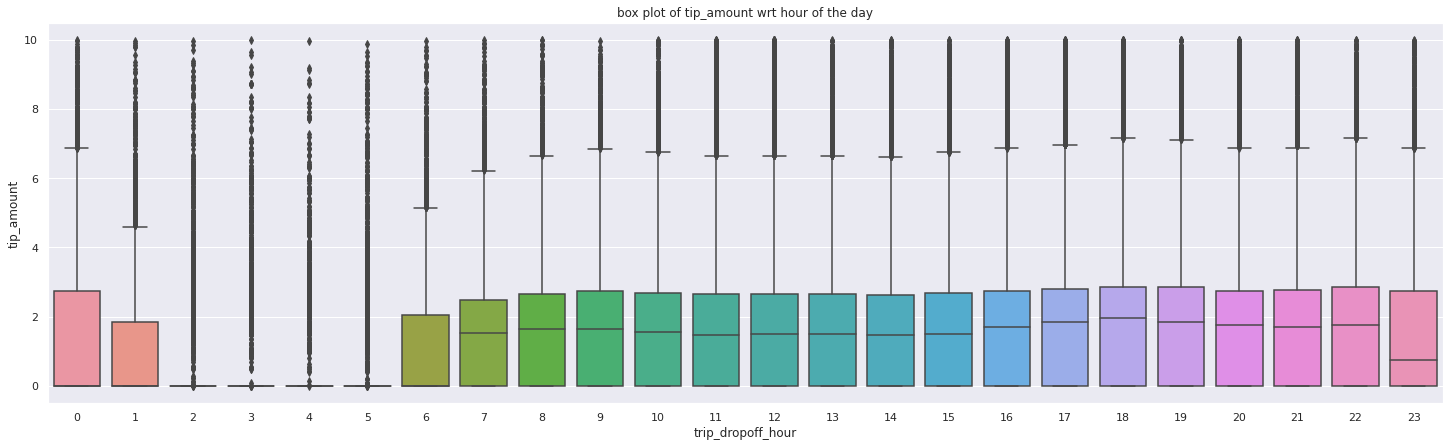

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

Based on tip_amount plot we can see that tip_amount is 0 during 2 AM to 5 AM.

Let's observe total_taxes now

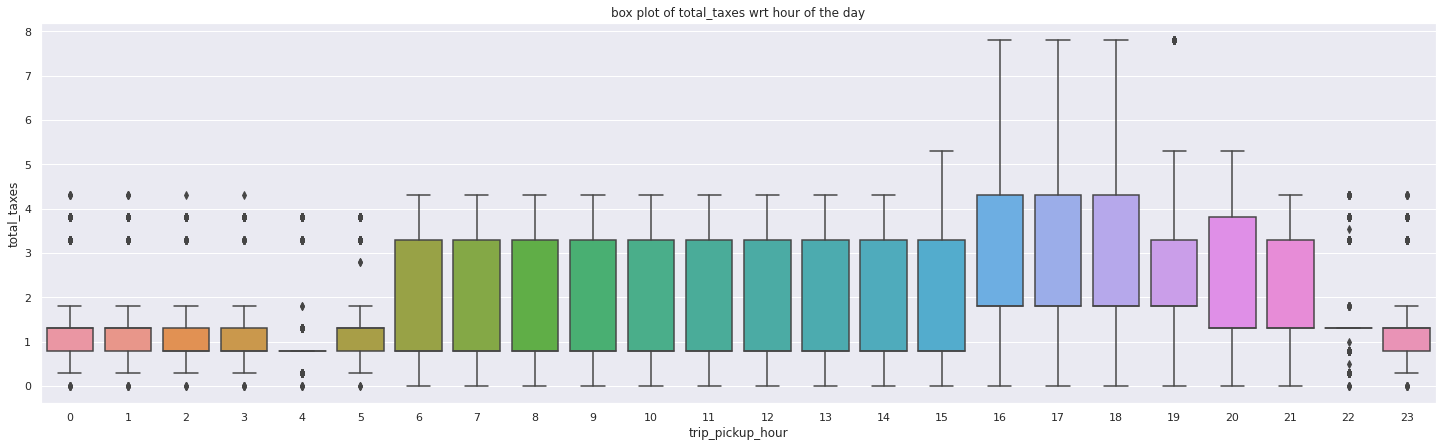

In [ ]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

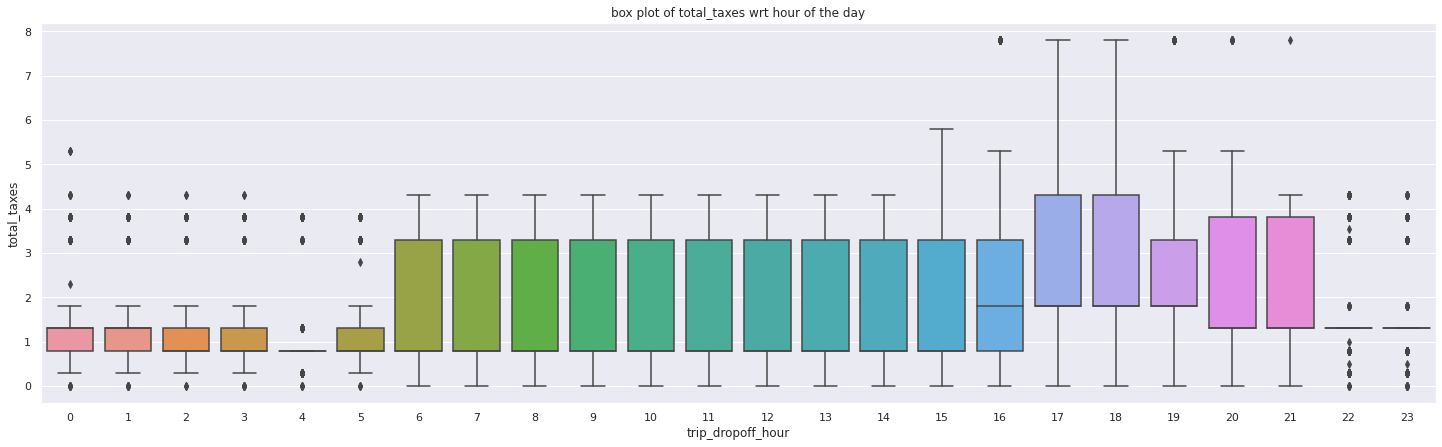

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

Now in this plot we can clearly observe that total_taxes change significantly with hour of the day. There are two patterns that we can observe here:<br>
* from the hour 12AM to 5AM the median taxes seem to be lower than other hours.
* Evening from 5PM to 9PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

Overall the effect of hour of day is most clearly visible on total_taxes. we have two insights about how taxes change with hours
* Overnight charges are not applied between 9PM to 12AM
* Evening has higher variability in taxes and the taxes are usually high.


Let's move and explore the distribution of pricing variables with respect to day of week. For this analysis we will be using restricited version of dataset that we built for fare_amount, total_amount, tip_amount and total_taxes.

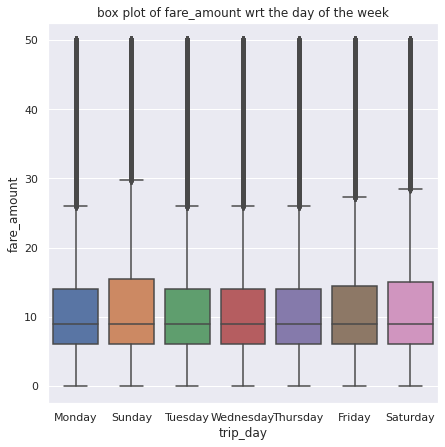

In [ ]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

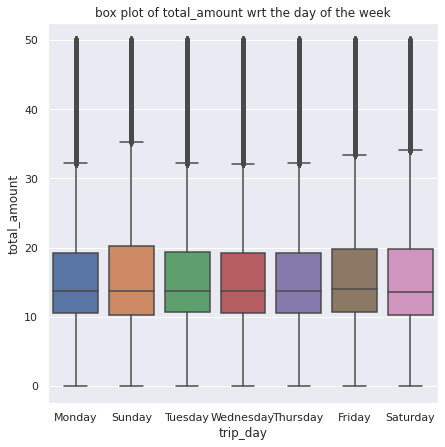

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week')
sns.set()
plt.show()

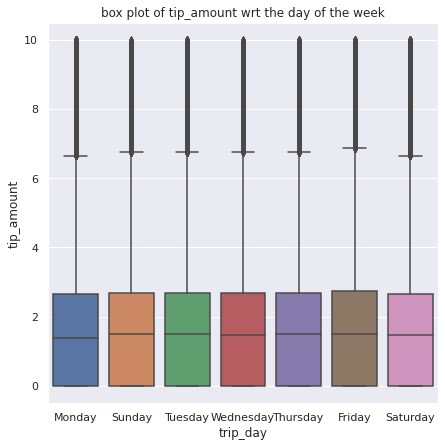

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

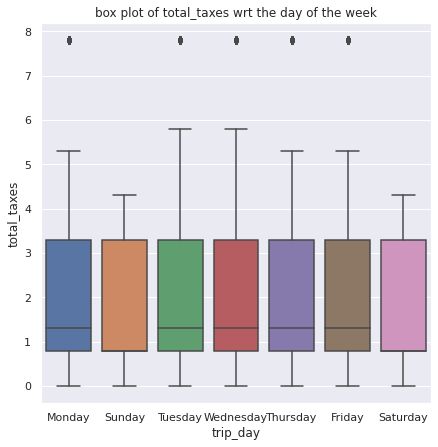

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that only tax value is less on sunday and saturday,otherwise no much change with respect to day of week.


*** PRICING VARIABLE EXPLORATION WITH LOCATION OF TRIP ***<br>

Here we will look into the price changes for the most frequent trip pickup locations.

In [ ]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

236    23014
237    22386
186    19751
140    19534
141    18943
Name: PULocationID, dtype: int64

In [ ]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([236, 237, 186, 140, 141, 263, 48, 238, 137, 170], dtype='int64')

The median fare_amount of trips taken from 236 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


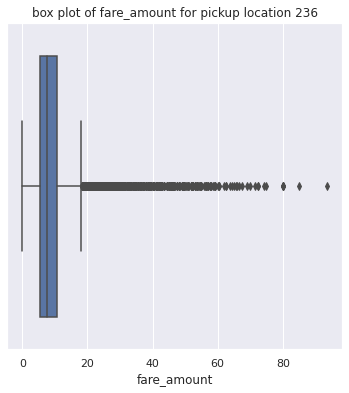

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


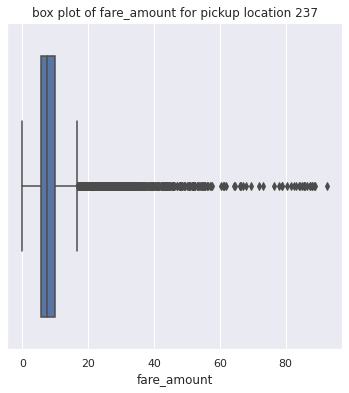

The median fare_amount of trips taken from 186 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


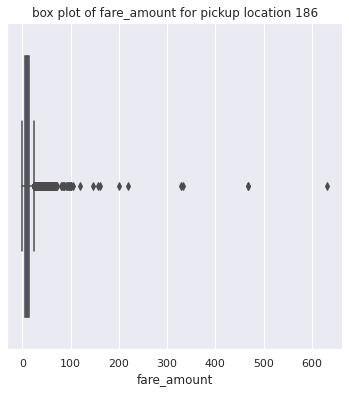

The median fare_amount of trips taken from 140 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


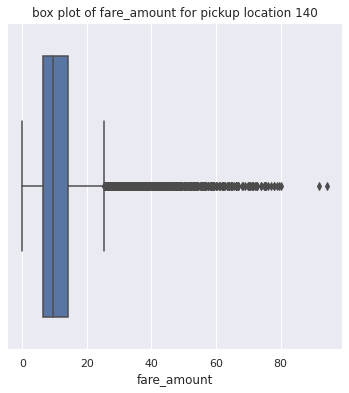

The median fare_amount of trips taken from 141 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


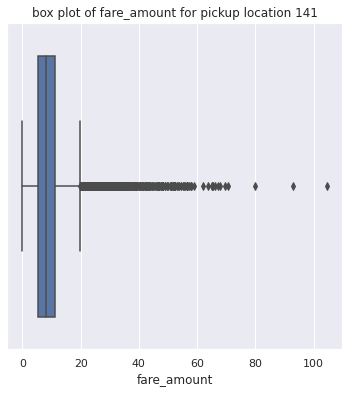

The median fare_amount of trips taken from 263 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


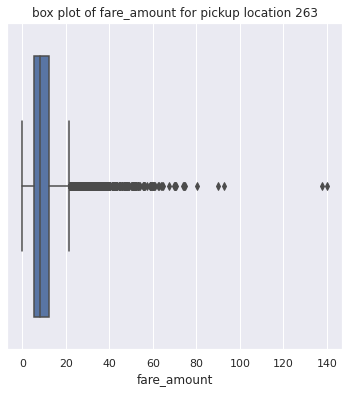

The median fare_amount of trips taken from 48 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


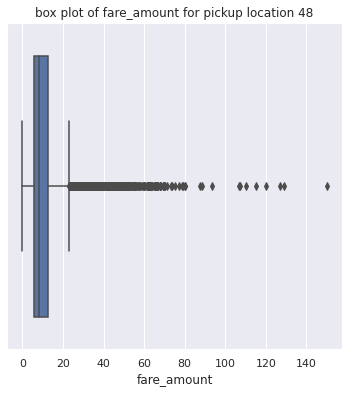

The median fare_amount of trips taken from 238 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


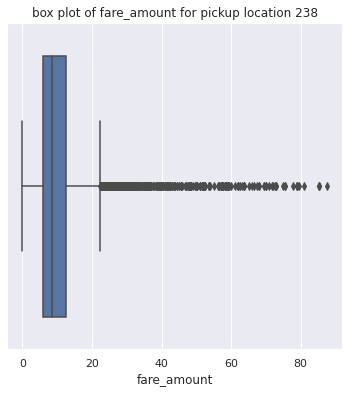

The median fare_amount of trips taken from 137 is 10.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


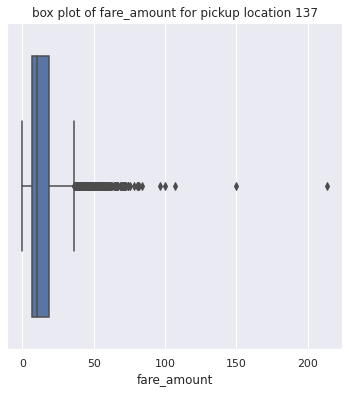

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


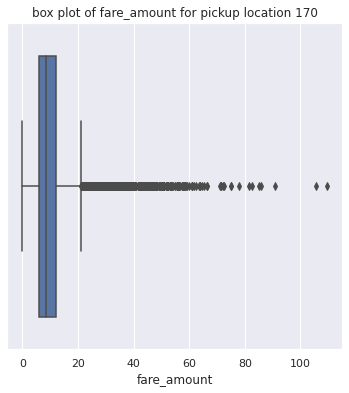

In [ ]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location median fare_amount is quite low in comparison to other busy locations. Though the outliers for pickup location 237,48.137 are high.

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

**DURATION EXPLORATION**

Here we will explore the duration of trip exploration with pickup hour of day.

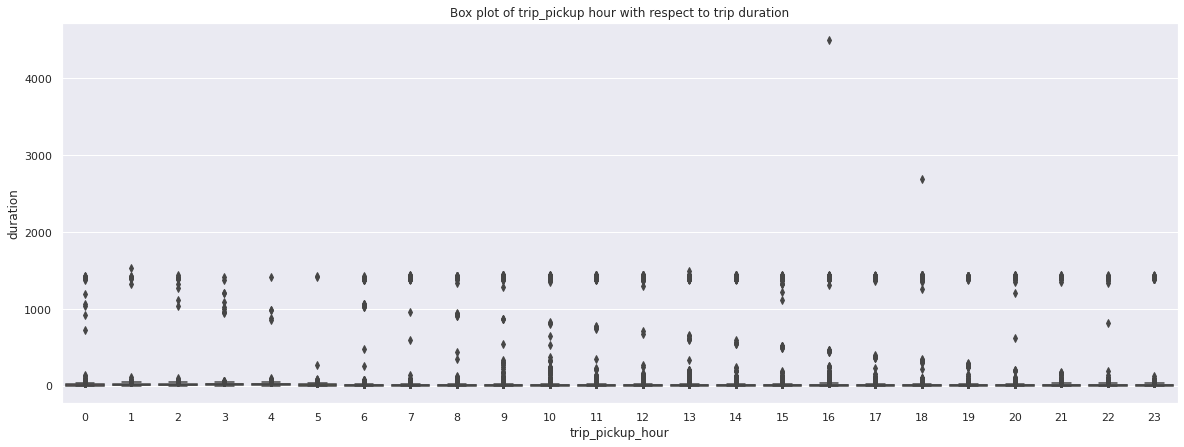

In [ ]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Here again due to heavy outliers in duration data we are not able to observe the general graph. we might need to restrict our duration values to within 50min. 

In [ ]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(541139, 18)

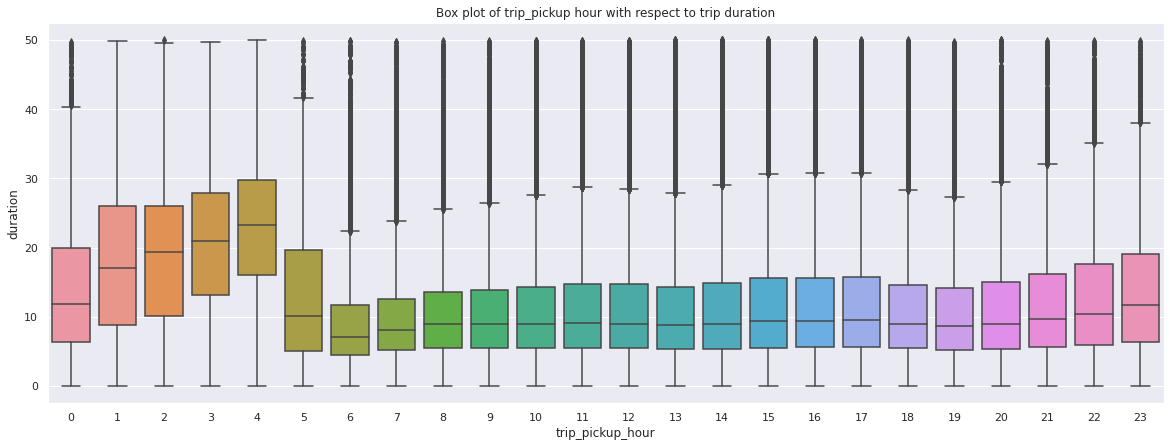

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Early morning and night hours of 11 PM TO morning 5PM longer have longer duration trips

Let's also explore duration with respect to top pickup location.

The median trip duration of trips taken from 236 is 7.716666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


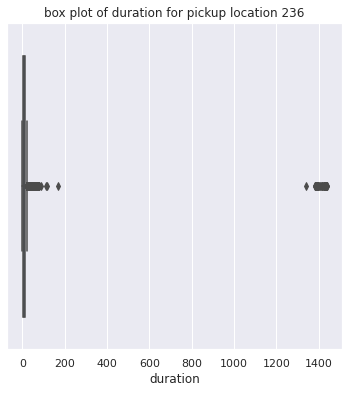

The median trip duration of trips taken from 237 is 7.233333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


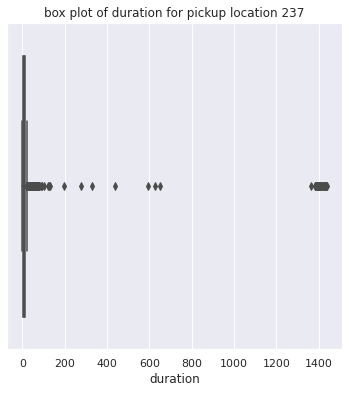

The median trip duration of trips taken from 186 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


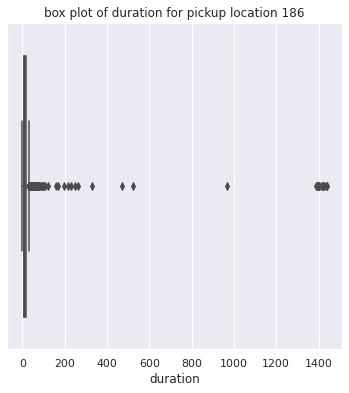

The median trip duration of trips taken from 140 is 9.966666666666669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


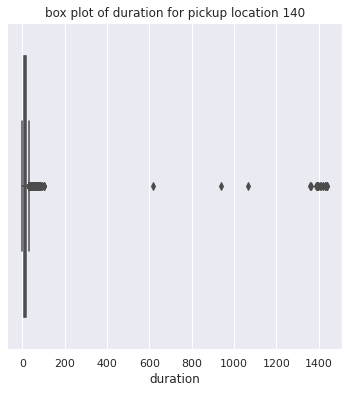

The median trip duration of trips taken from 141 is 7.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


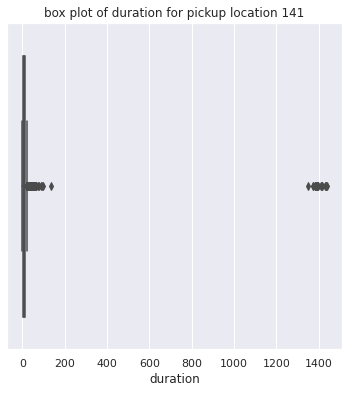

The median trip duration of trips taken from 263 is 7.916666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


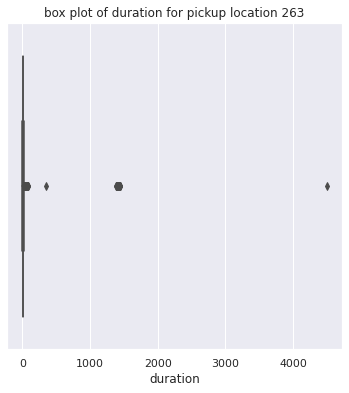

The median trip duration of trips taken from 48 is 8.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


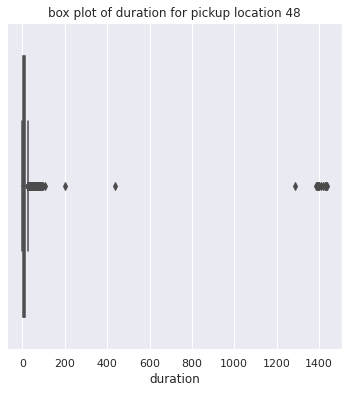

The median trip duration of trips taken from 238 is 8.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


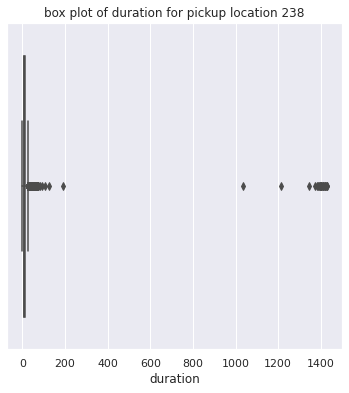

The median trip duration of trips taken from 137 is 9.966666666666669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


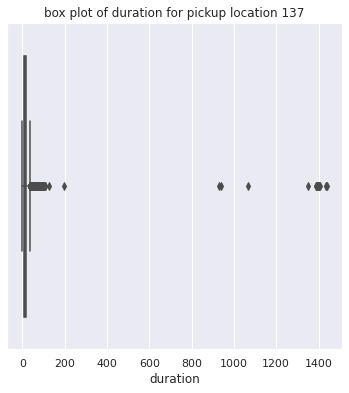

The median trip duration of trips taken from 170 is 8.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


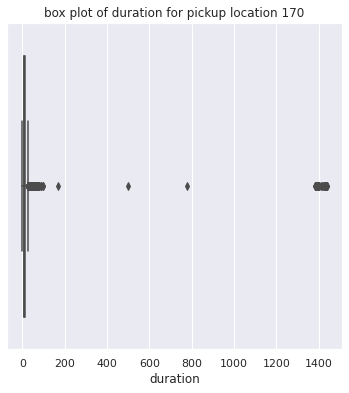

In [ ]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

Here again we can see for the most frequent pickup location 237 the duration value is less in comparison to other pickup locations, though 236,141 also have lower duration amount close to 8 min. this might be the reason for less fare_amount as well.

## FINAL RESULTS FROM EDA

Following insights would be useful for our company's product launch in New York


*  fare_amount  - most of the fare amount is within 10 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is 941 dollars.


* duration - most of the values in duration is within 10 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 1000 minutes.


*  tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars.


* trip_distance - most of the trip_distance is within 1.87 miles value as is shown by the median. The outlier in this case is quite less.
* Peak hour for the pick up and drop off is afternoon 12pm to 5PM. The busiest time is 3PM.

*   Sunday has the lowest taxi uses.
Weekdays except wednesday have heavy taxi uses.
Among weekends Staturday also lowest taxi uses.
 

* 5 busiest route are following:
237-236
264-264
236-237
236-236
75-74
* Credit card is the most preferred mode of payment followed by cash.

* The busiest location in terms of pickup and dropoff are 186,75, 236 and 237 
* Mostly 1 or 2 passenger avail the cab. Group rides are less common.
from the hour 12AM to 5AM the median taxes seem to be lower than other hours.

*   Overnight charges are not applied between 9PM to 12AM
* Evening has higher variability in taxes and the taxes are usually high.

* Early morning and night hours of 11 PM TO morning 5PM  have longer duration trips


